<a href="https://colab.research.google.com/github/mdkamrulhasan/data_mining_kdd/blob/main/notebooks/Exploratory_data_Analysis_automobile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This notebook covers:



### 1.   Loading Data from **Github**
### 2.   Data Processing through: **Pandas** and **Numpy**
### 3. Data visualizations: **matplotlib** and **seaborn**

[Partly adapted from ](https://colab.research.google.com/github/Tanu-N-Prabhu/Python/blob/master/Exploratory_data_Analysis.ipynb)


# After completing this notebook, you should be able to answer the following (and/or other similar) quesions:

- ## How many rows and columns (features) are there in a table?
- ##  What are the different data types?
- ##  Are there any missing values in any columns? How will you deal with these missing values?
- ##  Can you summarize some features and the data as a whole?
- ##  Are all data trustworthy, or are there any outliers in the data?
- ##  Is there any association among features? Can you explain, if you have detected any association?


#### *Note: We will be answering most of the questions above for a specfic dataset on "automobiles". Its your time to explore similar questions for other datasets, and you will get a fair list of dataset [here ](https://github.com/mdkamrulhasan/data_mining_kdd/tree/main/data)*

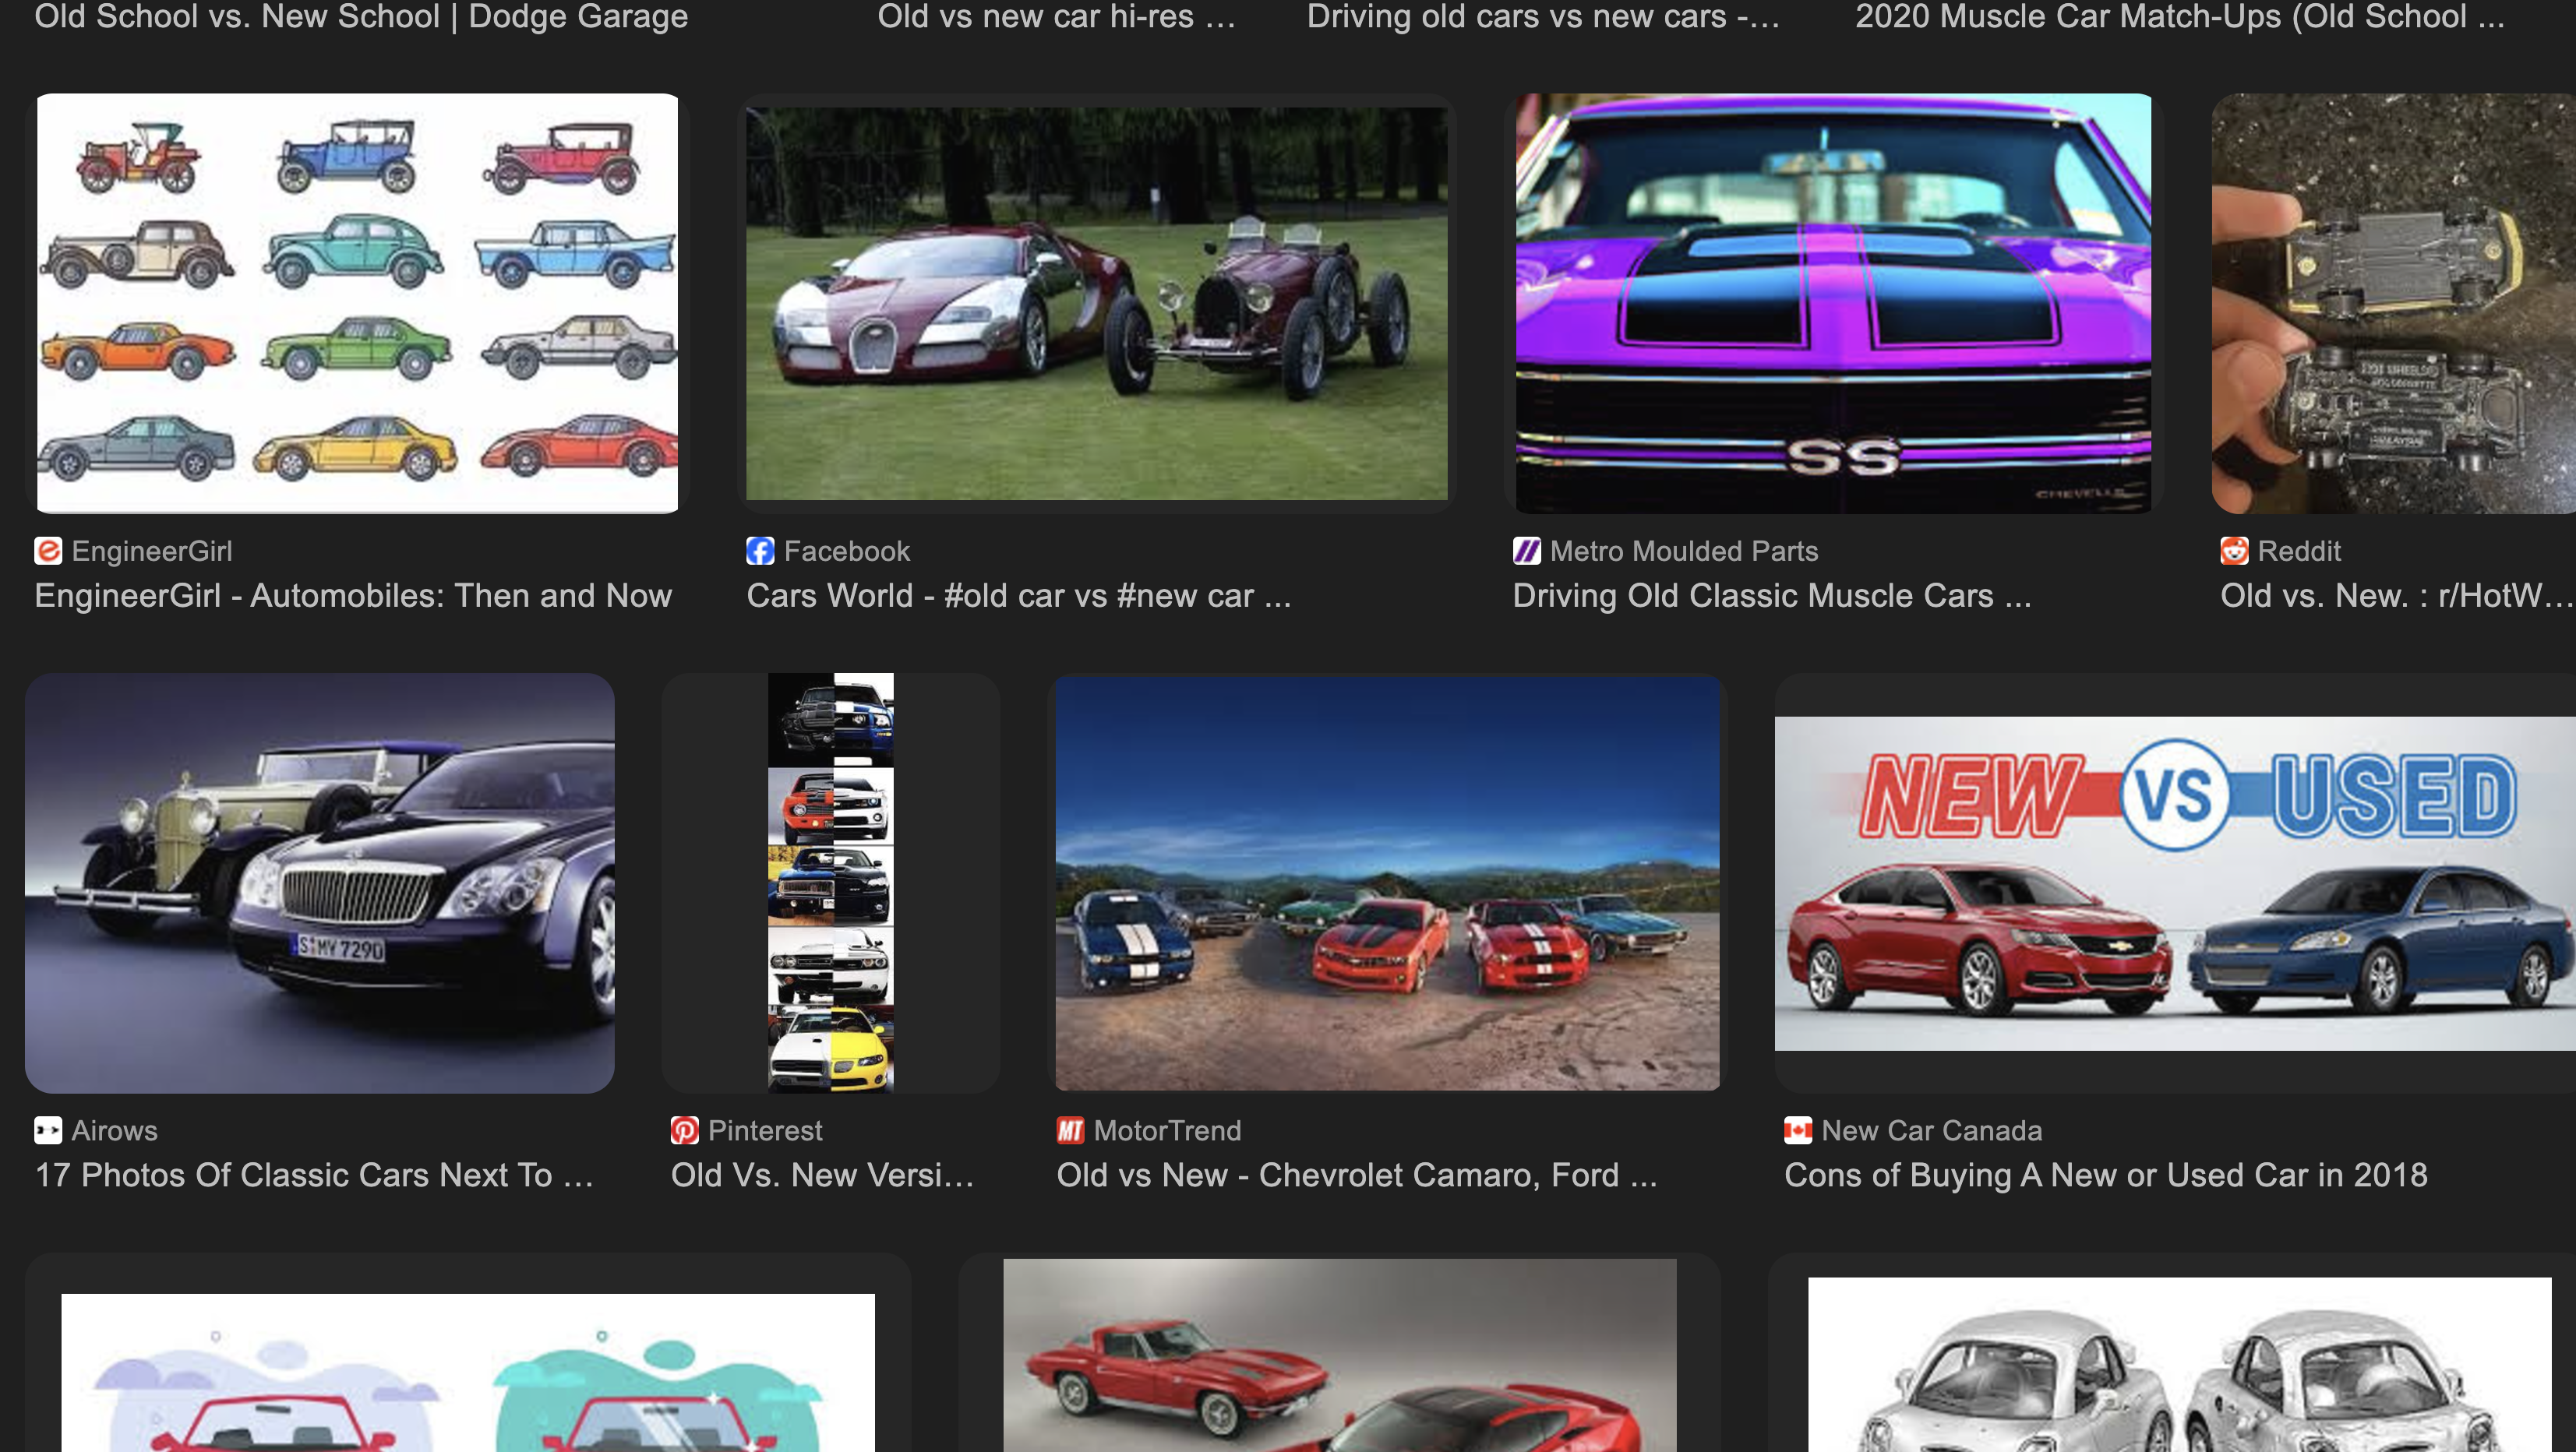

# Importing libraries

In [ ]:
# data processing
import pandas as pd
import numpy as np
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)



---



## Loading Data from **Github**

In [ ]:
data_url = 'https://raw.githubusercontent.com/mdkamrulhasan/data_mining_kdd/main/data/automobile/automobile.csv'
df = pd.read_csv(data_url)

In [ ]:
df.shape

(11914, 16)

In [ ]:
df.head(2)

Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   

   highway MPG  city mpg  Popularity   MSRP  
0           26        19        3916  46135  
1           28        19        3916  40650

In [ ]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [ ]:
df.head(2).T

0  \
Make                                                 BMW   
Model                                         1 Series M   
Year                                                2011   
Engine Fuel Type             premium unleaded (required)   
Engine HP                                          335.0   
Engine Cylinders                                     6.0   
Transmission Type                                 MANUAL   
Driven_Wheels                           rear wheel drive   
Number of Doors                                      2.0   
Market Category    Factory Tuner,Luxury,High-Performance   
Vehicle Size                                     Compact   
Vehicle Style                                      Coupe   
highway MPG                                           26   
city mpg                                              19   
Popularity                                          3916   
MSRP                                               46135   

                                             1  
Make                                       BMW  
Model                                 1 Series  
Year                                      2011  
Engine Fuel Type   premium unleaded (required)  
Engine HP                                300.0  
Engine Cylinders                           6.0  
Transmission Type                       MANUAL  
Driven_Wheels                 rear wheel drive  
Number of Doors                            2.0  
Market Category             Luxury,Performance  
Vehicle Size                           Compact  
Vehicle Style                      Convertible  
highway MPG                                 28  
city mpg                                    19  
Popularity                                3916  
MSRP                                     40650

In [ ]:
df.tail(2)

Make   Model  Year                Engine Fuel Type  Engine HP  \
11912    Acura     ZDX  2013  premium unleaded (recommended)      300.0   
11913  Lincoln  Zephyr  2006                regular unleaded      221.0   

       Engine Cylinders Transmission Type      Driven_Wheels  Number of Doors  \
11912               6.0         AUTOMATIC    all wheel drive              4.0   
11913               6.0         AUTOMATIC  front wheel drive              4.0   

                  Market Category Vehicle Size  Vehicle Style  highway MPG  \
11912  Crossover,Hatchback,Luxury      Midsize  4dr Hatchback           23   
11913                      Luxury      Midsize          Sedan           26   

       city mpg  Popularity   MSRP  
11912        16         204  50920  
11913        17          61  28995



---



# Checking the data types

In [ ]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

# $\color{red}{\text{Careful when you find a column with object data type !!!}}$
Python loads str or mixed data as the $\color{blue}{\text{object}}$ type:

# Exploring unique values & size of your data

In [ ]:
df.Make.unique()

array(['BMW', 'Audi', 'FIAT', 'Mercedes-Benz', 'Chrysler', 'Nissan',
       'Volvo', 'Mazda', 'Mitsubishi', 'Ferrari', 'Alfa Romeo', 'Toyota',
       'McLaren', 'Maybach', 'Pontiac', 'Porsche', 'Saab', 'GMC',
       'Hyundai', 'Plymouth', 'Honda', 'Oldsmobile', 'Suzuki', 'Ford',
       'Cadillac', 'Kia', 'Bentley', 'Chevrolet', 'Dodge', 'Lamborghini',
       'Lincoln', 'Subaru', 'Volkswagen', 'Spyker', 'Buick', 'Acura',
       'Rolls-Royce', 'Maserati', 'Lexus', 'Aston Martin', 'Land Rover',
       'Lotus', 'Infiniti', 'Scion', 'Genesis', 'HUMMER', 'Tesla',
       'Bugatti'], dtype=object)

In [ ]:
df['Engine Cylinders'].unique()

array([ 6.,  4.,  5.,  8., 12.,  0., nan, 10.,  3., 16.])

In [ ]:
df.Make.nunique()

48



---



# Describing some statistics
$\color{blue}{\text{Numeric data columns only}}$

In [ ]:
df.describe()

Year    Engine HP  Engine Cylinders  Number of Doors  \
count  11914.000000  11845.00000      11884.000000     11908.000000   
mean    2010.384338    249.38607          5.628829         3.436093   
std        7.579740    109.19187          1.780559         0.881315   
min     1990.000000     55.00000          0.000000         2.000000   
25%     2007.000000    170.00000          4.000000         2.000000   
50%     2015.000000    227.00000          6.000000         4.000000   
75%     2016.000000    300.00000          6.000000         4.000000   
max     2017.000000   1001.00000         16.000000         4.000000   

        highway MPG      city mpg    Popularity          MSRP  
count  11914.000000  11914.000000  11914.000000  1.191400e+04  
mean      26.637485     19.733255   1554.911197  4.059474e+04  
std        8.863001      8.987798   1441.855347  6.010910e+04  
min       12.000000      7.000000      2.000000  2.000000e+03  
25%       22.000000     16.000000    549.000000  2.100000e+04  
50%       26.000000     18.000000   1385.000000  2.999500e+04  
75%       30.000000     22.000000   2009.000000  4.223125e+04  
max      354.000000    137.000000   5657.000000  2.065902e+06

# Making the dataframe light-weight by removing some columns

In [ ]:
df = df.drop(columns=['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)
df.head(5)

Make       Model  Year  Engine HP  Engine Cylinders Transmission Type  \
0  BMW  1 Series M  2011      335.0               6.0            MANUAL   
1  BMW    1 Series  2011      300.0               6.0            MANUAL   
2  BMW    1 Series  2011      300.0               6.0            MANUAL   
3  BMW    1 Series  2011      230.0               6.0            MANUAL   
4  BMW    1 Series  2011      230.0               6.0            MANUAL   

      Driven_Wheels  highway MPG  city mpg   MSRP  
0  rear wheel drive           26        19  46135  
1  rear wheel drive           28        19  40650  
2  rear wheel drive           28        20  36350  
3  rear wheel drive           28        18  29450  
4  rear wheel drive           28        18  34500

In [ ]:
df.shape

(11914, 10)



---



## Renaming columns

In [ ]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(5)

Make       Model  Year     HP  Cylinders Transmission        Drive Mode  \
0  BMW  1 Series M  2011  335.0        6.0       MANUAL  rear wheel drive   
1  BMW    1 Series  2011  300.0        6.0       MANUAL  rear wheel drive   
2  BMW    1 Series  2011  300.0        6.0       MANUAL  rear wheel drive   
3  BMW    1 Series  2011  230.0        6.0       MANUAL  rear wheel drive   
4  BMW    1 Series  2011  230.0        6.0       MANUAL  rear wheel drive   

   MPG-H  MPG-C  Price  
0     26     19  46135  
1     28     19  40650  
2     28     20  36350  
3     28     18  29450  
4     28     18  34500



---



## Dealing with duplicate rows

In [ ]:
df.shape

(11914, 10)

In [ ]:
df[df.duplicated()].head()

Make     Model  Year     HP  Cylinders Transmission         Drive Mode  \
14   BMW  1 Series  2013  230.0        6.0       MANUAL   rear wheel drive   
18  Audi       100  1992  172.0        6.0       MANUAL  front wheel drive   
20  Audi       100  1992  172.0        6.0       MANUAL  front wheel drive   
24  Audi       100  1993  172.0        6.0       MANUAL  front wheel drive   
25  Audi       100  1993  172.0        6.0       MANUAL  front wheel drive   

    MPG-H  MPG-C  Price  
14     28     19  31500  
18     24     17   2000  
20     24     17   2000  
24     24     17   2000  
25     24     17   2000

In [ ]:
df[~df.duplicated()].shape, df[df.duplicated()].shape

In [ ]:
df[df.duplicated()].shape

In [ ]:
duplicate_rows_df = df[df.duplicated()]
duplicate_rows_df.head()

So seen above there are 11914 rows and we are removing 989 rows of duplicate data.

In [ ]:
df_no_duplcates = df.drop_duplicates()
df.shape, df_no_duplcates.shape

# Dealing with Missing values



---



In [ ]:
df.isnull().sum()

In [ ]:
df.isnull().sum().sum()

In [ ]:
all_value_df = df[~df.isna().any(axis=1)]

In [ ]:
all_value_df.shape, df.shape

In [ ]:
df[df.isna().any(axis=1)].shape

In [ ]:
df[~df.isna().any(axis=1)].shape

(11816, 10)

In [ ]:
df[df.isna().any(axis=1)].head()

### Question: Can you extract the records with both 'HP'	and 'Cylinders' values are null?

## Column Mean and Mode

In [ ]:
df.HP.mean()

In [ ]:
df.HP.mode()

In [ ]:
df.Model.mode()

## Missing/Null value imputations

## Replacing missing/null values with the mode

In [ ]:
cylynder_mode = df.Cylinders.mode()
print(cylynder_mode)
df['Cylinders'] = df['Cylinders'].fillna(cylynder_mode[0])

### You can also replace with mean() or other scalars depending upon your situation.

In [ ]:
df.isna().sum()

In [ ]:
df.isna().sum().sum()

### Removing records with null values

In [ ]:
df_dropped_na = df.dropna()
df_dropped_na.shape



---



## Box plot (Some clue on Outliers)

In [ ]:
sns.boxplot(x=df['Price'])

In [ ]:
sns.boxplot(x=df['MPG-H'])

In [ ]:
sns.boxplot(x=df['MPG-C'])

In [ ]:
sns.boxplot(x=df['HP'])



---



# Frequency (couunt) plot

In [ ]:
df.Make.value_counts().nlargest(10).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');

# Correlation plot (heatmap)

In [ ]:
plt.figure(figsize=(10,5))
c = df[['HP', 'Cylinders', 'MPG-H', 'MPG-C', 'Price']].corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

## Correlation related questions:

* ### Can you think of some real world example of veraible that are positively correlated ?
* ###  Can you think of some real world example of veraible that are negatively correlated ?





In [ ]:
c

# Scatterplot

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

# Questions (Home work)

* ## Average "Chevrolet" price of those vehicles sold after 2000?
* ## Which "Brand" has the maximum number of "models" in the data?
* ## If I mostly drive in the city, what vehicle do you think will be cost effective?
* ## Did you find any outlier in the data? What is your resoning behind this conclusion?
* ## How outliers affect some estimates, say, mean/variance of certain variables? What would you do if you are certain about some outliers in your data?